In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)

In [47]:
# Solution set for CS 155 Set 6, 2016/2017
# Authors: Fabian Boemer, Sid Murching, Suraj Nair

import numpy as np

def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return (1-reg*eta)*Ui + eta * Vj * (Yij - np.dot(Ui,Vj))     

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return (1-reg*eta)*Vj + eta * Ui * (Yij - np.dot(Ui,Vj))

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    # Compute mean squared error on each data point in Y; include
    # regularization penalty in error calculations.
    # We first compute the total squared squared error
    err = 0.0
    for (i,j,Yij) in Y:
        err += 0.5 *(Yij - np.dot(U[i-1], V[:,j-1]))**2
    # Add error penalty due to regularization if regularization
    # parameter is nonzero
    if reg != 0:
        U_frobenius_norm = np.linalg.norm(U, ord='fro')
        V_frobenius_norm = np.linalg.norm(V, ord='fro')
        err += 0.5 * reg * (U_frobenius_norm ** 2)
        err += 0.5 * reg * (V_frobenius_norm ** 2)
    # Return the mean of the regularized error
    return err / float(len(Y))

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    # Initialize U, V  
    U = np.random.random((M,K)) - 0.5
    V = np.random.random((K,N)) - 0.5
    size = Y.shape[0]
    delta = None
    indices = np.arange(size)    
    for epoch in range(max_epochs):
        # Run an epoch of SGD
        before_E_in = get_err(U, V, Y, reg)
        np.random.shuffle(indices)
        for ind in indices:
            (i,j, Yij) = Y[ind]
            # Update U[i], V[j]
            U[i-1] = grad_U(U[i-1], Yij, V[:,j-1], reg, eta)
            V[:,j-1] = grad_V(V[:,j-1], Yij, U[i-1], reg, eta);
        # At end of epoch, print E_in
        E_in = get_err(U, V, Y, reg)
        print("Epoch %s, E_in (regularized MSE): %s"%(epoch + 1, E_in))

        # Compute change in E_in for first epoch
        if epoch == 0:
            delta = before_E_in - E_in

        # If E_in doesn't decrease by some fraction <eps>
        # of the initial decrease in E_in, stop early            
        elif before_E_in - E_in < eps * delta:
            break
    return (U, V, get_err(U, V, Y))

In [48]:
M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
print("Factorizing with ", M, " users, ", N, " movies.")
K = 20 
regs = [10**-4, 10**-3, 10**-2, 10**-1, 1]
eta = 0.03 # learning rate
E_in = []
E_out = []

Factorizing with  943  users,  1682  movies.


In [49]:
for reg in regs:

    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, eta, reg))
    U,V, e_in = train_model(M, N, K, eta, reg, Y_train)
    E_in.append(e_in)
    eout = get_err(U, V, Y_test)
    E_out.append(eout)

Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001
Epoch 1, E_in (regularized MSE): 0.526585614252
Epoch 2, E_in (regularized MSE): 0.398414948615
Epoch 3, E_in (regularized MSE): 0.359601663347
Epoch 4, E_in (regularized MSE): 0.332848485644
Epoch 5, E_in (regularized MSE): 0.313587876846
Epoch 6, E_in (regularized MSE): 0.300809990659
Epoch 7, E_in (regularized MSE): 0.287667396683
Epoch 8, E_in (regularized MSE): 0.277497984026
Epoch 9, E_in (regularized MSE): 0.274520253056
Epoch 10, E_in (regularized MSE): 0.267822991202
Epoch 11, E_in (regularized MSE): 0.266942614551
Epoch 12, E_in (regularized MSE): 0.263980977143
Epoch 13, E_in (regularized MSE): 0.259273922119
Epoch 14, E_in (regularized MSE): 0.254884176646
Epoch 15, E_in (regularized MSE): 0.25489386009
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001
Epoch 1, E_in (regularized MSE): 0.51975879086
Epoch 2, E_in (regularized MSE): 0.402397490832
Epoch 3, E_in (regularized MSE): 0.35

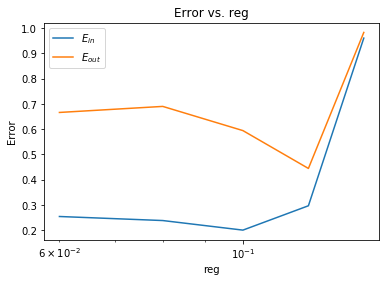

In [52]:
plt.plot(regs, E_in, label='$E_{in}$')
plt.plot(regs, E_out, label='$E_{out}$')
plt.xscale('log')
plt.title('Error vs. reg')
plt.xlabel('reg')
plt.ylabel('Error')
plt.legend()
plt.show()

In [51]:
regs = [0.06, 0.08, 0.1, 0.12, 0.14]
E_in2 = []
E_out2 = []
for reg in regs:

    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, eta, reg))
    U,V, e_in = train_model(M, N, K, eta, reg, Y_train)
    E_in2.append(e_in)
    eout = get_err(U, V, Y_test)
    E_out2.append(eout)

Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.06
Epoch 1, E_in (regularized MSE): 0.502756380511
Epoch 2, E_in (regularized MSE): 0.408979770908
Epoch 3, E_in (regularized MSE): 0.368576066867
Epoch 4, E_in (regularized MSE): 0.347871509052
Epoch 5, E_in (regularized MSE): 0.331271503208
Epoch 6, E_in (regularized MSE): 0.317245396269
Epoch 7, E_in (regularized MSE): 0.305427360746
Epoch 8, E_in (regularized MSE): 0.293190243406
Epoch 9, E_in (regularized MSE): 0.285460632956
Epoch 10, E_in (regularized MSE): 0.275072117285
Epoch 11, E_in (regularized MSE): 0.270733603494
Epoch 12, E_in (regularized MSE): 0.267265495767
Epoch 13, E_in (regularized MSE): 0.263471666304
Epoch 14, E_in (regularized MSE): 0.256276872092
Epoch 15, E_in (regularized MSE): 0.250913224839
Epoch 16, E_in (regularized MSE): 0.249935791491
Epoch 17, E_in (regularized MSE): 0.248212972728
Epoch 18, E_in (regularized MSE): 0.243791783187
Epoch 19, E_in (regularized MSE): 0.24239162487
Epoch 20,

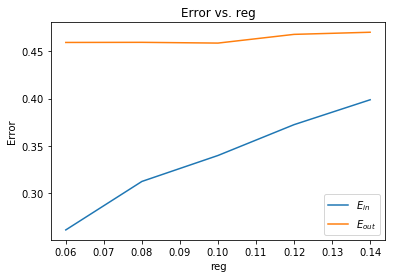

In [38]:
plt.plot(regs, E_in2, label='$E_{in}$')
plt.plot(regs, E_out2, label='$E_{out}$')
plt.title('Error vs. reg')
plt.xlabel('reg')
plt.ylabel('Error')
plt.legend()
plt.show()

In [53]:
eps = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1]
reg = 0.1
E_in3 = []
E_out3 = []
for ep in eps:

    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, eta, reg))
    U,V, e_in = train_model(M, N, K, eta, reg, Y_train, ep)
    E_in3.append(e_in)
    eout = get_err(U, V, Y_test)
    E_out3.append(eout)

Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.1
Epoch 1, E_in (regularized MSE): 0.511922666466
Epoch 2, E_in (regularized MSE): 0.439934620184
Epoch 3, E_in (regularized MSE): 0.412059005934
Epoch 4, E_in (regularized MSE): 0.392869175915
Epoch 5, E_in (regularized MSE): 0.382229359267
Epoch 6, E_in (regularized MSE): 0.371073714078
Epoch 7, E_in (regularized MSE): 0.361367734242
Epoch 8, E_in (regularized MSE): 0.350036324966
Epoch 9, E_in (regularized MSE): 0.344113684382
Epoch 10, E_in (regularized MSE): 0.336194081242
Epoch 11, E_in (regularized MSE): 0.330932234217
Epoch 12, E_in (regularized MSE): 0.323199858624
Epoch 13, E_in (regularized MSE): 0.319107881405
Epoch 14, E_in (regularized MSE): 0.316294083585
Epoch 15, E_in (regularized MSE): 0.313901642273
Epoch 16, E_in (regularized MSE): 0.31029607939
Epoch 17, E_in (regularized MSE): 0.307424561365
Epoch 18, E_in (regularized MSE): 0.304084802846
Epoch 19, E_in (regularized MSE): 0.30173822338
Epoch 20, E

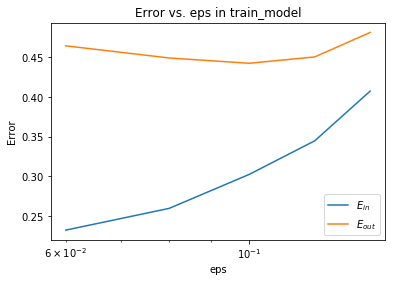

In [55]:
plt.plot(regs, E_in2, label='$E_{in}$')
plt.plot(regs, E_out2, label='$E_{out}$')
plt.xscale('log')
plt.title('Error vs. eps in train_model')
plt.xlabel('eps')
plt.ylabel('Error')
plt.legend()
plt.show()